<a href="https://colab.research.google.com/github/fboldt/postre/blob/main/aula5_classifica%C3%A7%C3%A3o_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
dataset = load_iris()
X, y = dataset.data, dataset.target
X.shape, y.shape, set(y)

((150, 4), (150,), {0, 1, 2})

In [2]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'},

In [5]:
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X.to_numpy()[:,2:4], y.to_numpy(), random_state=42)
ytr = ytr.reshape(-1,)
yte = yte.reshape(-1,)
Xtr.shape, Xte.shape, ytr.shape, yte.shape,

((112, 2), (38, 2), (112,), (38,))

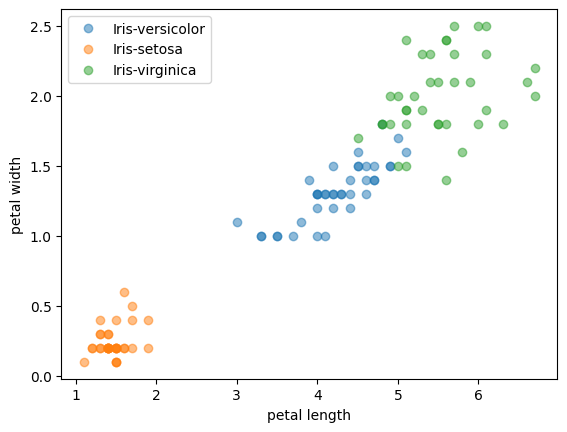

In [6]:
import matplotlib.pyplot as plt

plt.xlabel("petal length")
plt.ylabel("petal width")
for k in set(ytr):
  plt.plot(Xtr[:,0][ytr==k], Xtr[:,1][ytr==k], "o", alpha=0.5)
plt.legend(set(ytr))
plt.show()

In [7]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

def addBias(X):
  bias = np.ones((X.shape[0], 1))
  X_b = np.concatenate((bias, X), axis=1)
  return X_b

class ClassificadorLinear(BaseEstimator, ClassifierMixin):
  def __init__(self, taxa_aprendizado=0.0001, max_iter=10000):
    self.taxa_aprendizado = taxa_aprendizado
    self.max_iter = max_iter

  def fit(self, X, y):
    X_b = addBias(X)
    self.labels_ = sorted(list(set(y)))
    self.w = np.random.uniform(size=(X_b.shape[1], len(self.labels_)))
    yhot = np.zeros((len(y), len(self.labels_)))
    for i in range(len(self.labels_)):
      yhot[:,i] = y==self.labels_[i]
    for _ in range(self.max_iter):
      ypred = X_b @ self.w
      erros = ypred - yhot
      ajuste = X_b.T @ erros
      self.w = self.w - self.taxa_aprendizado * ajuste

  def predict(self, X, y=None):
    X_b = addBias(X)
    yhot = X_b @ self.w
    yidx = np.argmax(yhot, axis=1)
    ypred = np.array([self.labels_[i] for i in yidx])
    return ypred

modelo = ClassificadorLinear()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
sum(ypred==yte)/len(yte)

0.8421052631578947

In [8]:
np.array([yte==ypred, yte, ypred]).T

array([[True, 'Iris-versicolor', 'Iris-versicolor'],
       [True, 'Iris-setosa', 'Iris-setosa'],
       [True, 'Iris-virginica', 'Iris-virginica'],
       [False, 'Iris-versicolor', 'Iris-virginica'],
       [True, 'Iris-versicolor', 'Iris-versicolor'],
       [True, 'Iris-setosa', 'Iris-setosa'],
       [False, 'Iris-versicolor', 'Iris-virginica'],
       [True, 'Iris-virginica', 'Iris-virginica'],
       [False, 'Iris-versicolor', 'Iris-virginica'],
       [True, 'Iris-versicolor', 'Iris-versicolor'],
       [True, 'Iris-virginica', 'Iris-virginica'],
       [True, 'Iris-setosa', 'Iris-setosa'],
       [True, 'Iris-setosa', 'Iris-setosa'],
       [True, 'Iris-setosa', 'Iris-setosa'],
       [True, 'Iris-setosa', 'Iris-setosa'],
       [False, 'Iris-versicolor', 'Iris-virginica'],
       [True, 'Iris-virginica', 'Iris-virginica'],
       [True, 'Iris-versicolor', 'Iris-versicolor'],
       [True, 'Iris-versicolor', 'Iris-versicolor'],
       [True, 'Iris-virginica', 'Iris-virginica']

In [9]:
modelo.w

array([[ 1.25491722, -0.04589845, -0.20159621],
       [-0.25264392,  0.28453431, -0.0387716 ],
       [ 0.01620716, -0.56793869,  0.56740665]])

In [10]:
intercept = modelo.w[0]
intercept

array([ 1.25491722, -0.04589845, -0.20159621])

In [11]:
coef = modelo.w[1:]
coef

array([[-0.25264392,  0.28453431, -0.0387716 ],
       [ 0.01620716, -0.56793869,  0.56740665]])

In [12]:
def plot_hyperplane(X, coef, intercept, column=0, color='black'):
  def line(x0):
    return (-(x0 * coef[0, column]) - intercept[column]) / coef[1, column]
  xmin = min(X[:,0])
  xmax = max(X[:,0])
  plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="-", color=color)

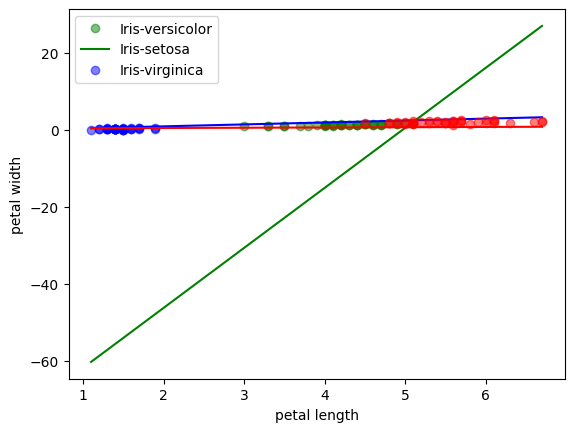

In [13]:
plt.xlabel("petal length")
plt.ylabel("petal width")
colors = ['green', 'blue', 'red']
for i,k in enumerate(set(ytr)):
  plt.plot(Xtr[:,0][ytr==k], Xtr[:,1][ytr==k], "o", alpha=0.5, color=colors[i])
  plot_hyperplane(Xtr, modelo.w[1:], modelo.w[0], i, colors[i])
plt.legend(set(ytr))
plt.show()

In [14]:
from sklearn.model_selection import cross_validate

scores = cross_validate(ClassificadorLinear(), X.to_numpy(), y.to_numpy().reshape(-1,))
np.mean(scores['test_score'])

0.8333333333333334

In [16]:
from sklearn.model_selection import GridSearchCV

params = {
    'taxa_aprendizado': [0.0001, 0.00001],
    'max_iter': [10000, 20000]
}

modelo = GridSearchCV(ClassificadorLinear(), params)
scores = cross_validate(modelo, X.to_numpy(), y.to_numpy().reshape(-1,))
np.mean(scores['test_score'])

0.7933333333333333

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', ClassificadorLinear())
])

params = {
    'clf__taxa_aprendizado': [0.001, 0.0001, 0.00001],
    'clf__max_iter': [10000, 20000]
}

modelo = GridSearchCV(pipeline, params)
scores = cross_validate(modelo, X.to_numpy(), y.to_numpy().reshape(-1,))
np.mean(scores['test_score'])

0.8066666666666666

In [44]:
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier())
])

scores = cross_validate(pipeline, X.to_numpy(), y.to_numpy().reshape(-1,))
np.mean(scores['test_score'])

0.9333333333333333

In [45]:
params = {
    'clf__penalty': ['l2', 'l1', 'elasticnet'],
}

modelo = GridSearchCV(pipeline, params)
scores = cross_validate(modelo, X.to_numpy(), y.to_numpy().reshape(-1,))
np.mean(scores['test_score'])

0.9199999999999999

In [46]:
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
sum(ypred==yte)/len(yte)

1.0

In [58]:
modelo.best_estimator_.named_steps['clf']

SGDClassifier(penalty='l1')

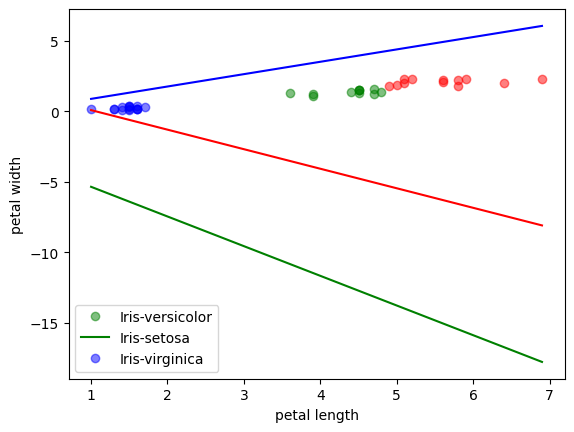

In [57]:
plt.xlabel("petal length")
plt.ylabel("petal width")
colors = ['green', 'blue', 'red']
for i,k in enumerate(set(yte)):
  plt.plot(Xte[:,0][yte==k], Xte[:,1][yte==k], "o", alpha=0.5, color=colors[i])
  plot_hyperplane(Xte, modelo.best_estimator_.named_steps['clf'].coef_.T,
                  modelo.best_estimator_.named_steps['clf'].intercept_, i, colors[i])
plt.legend(set(yte))
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier()
scores = cross_validate(modelo, X.to_numpy(), y.to_numpy().reshape(-1,))
np.mean(scores['test_score'])

0.9533333333333334

In [33]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

modelo = MLPClassifier()
scores = cross_validate(modelo, X.to_numpy(), y.to_numpy().reshape(-1,))
np.mean(scores['test_score'])

0.9866666666666667